# **Time Series Prediction using RNN (Stock Market Analysis)**

In [1]:
!pip install yfinance --quiet

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [3]:
# Step 2: Load Stock Data (Apple as example)
stock_symbol = "AAPL"
data = yf.download(stock_symbol, start="2015-01-01", end="2023-12-31")

/tmp/ipython-input-454172508.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start="2015-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed


In [4]:
# Use 'Close' price for prediction
prices = data[['Close']].values

In [5]:
# Step 3: Normalize Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(prices)

In [7]:
# Step 4: Prepare training data
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_prices)):
    X.append(scaled_prices[i-sequence_length:i, 0])
    y.append(scaled_prices[i, 0])


X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [8]:
# Step 5: Split into train & test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [9]:
# Step 6: Build RNN Model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Step 7: Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0213 - val_loss: 0.0016
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 4.4490e-04 - val_loss: 0.0015
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.7860e-04 - val_loss: 0.0017
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.8735e-04 - val_loss: 8.4285e-04
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.2426e-04 - val_loss: 0.0017
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.4477e-04 - val_loss: 6.9206e-04
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 2.1626e-04 - val_loss: 9.0093e-04
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.8025e-04 - val_loss: 6.8147e-04
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 1.7223e-04 - val_loss: 7.0709e-04
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7006e-04 - val_loss: 6.4813e-04
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.9004e-04 - val_loss: 5.2866

In [11]:
# Step 8: Make Predictions
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


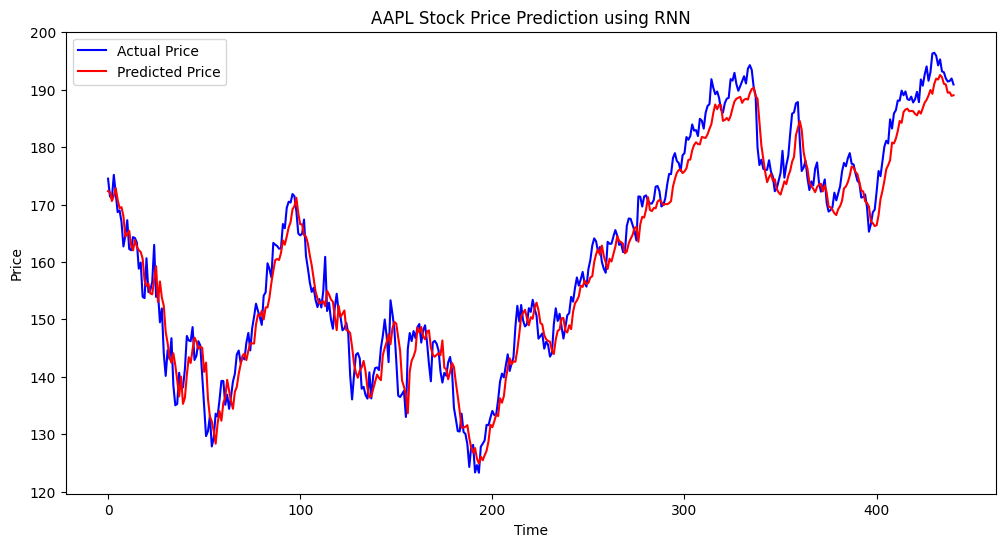

In [12]:
# Step 9: Plot Results
plt.figure(figsize=(12,6))
plt.plot(y_test_rescaled, color='blue', label='Actual Price')
plt.plot(y_pred_rescaled, color='red', label='Predicted Price')
plt.title(f'{stock_symbol} Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()